# Семинар 13
# Введение в метод Ньютона




**Вопрос:** Опишите возможности оракула. Что принимает оракул на вход, а что может дать на выход?

## Интуиция


### Метод Ньютона для нахождения корней уравнения

Рассмотрим некоторую функцию $\phi(x):\mathbb{R} \rightarrow \mathbb{R}$. Пусть имеется уравнение $\phi(x^*) = 0$. Рассмотрим линейную аппроксимацию функции $\phi(x)$ вблизи решения ($\Delta x = x^* - x$):
\begin{equation}
  \phi(x^*) = \phi(x + Δx) \approx \phi(x) + \phi'(x) \Delta x.
\end{equation}

Получаем приблеженное равенство:

\begin{equation}
  \phi(x) + \phi'(x) \Delta x = 0
\end{equation}

Тогда можно считать, что решение уравнения $\Delta x = - \frac{\phi(x)}{\phi'(x)}$ будет близко к оптимальному $\Delta x = x^* - x$.

Получаем итерационную схему:
\begin{equation}
  x_{k+1} = x_k - \frac{\phi(x)}{\phi'(x)}.
\end{equation}

Это рассуждение можно применить к задаче безусловной минимизации функции $f(x)$, записав необходимое условие экстремума:

\begin{equation}
  f'(x^*) = 0 .
\end{equation}
Здесь $\phi(x) = f'(x)$, $\phi'(x) = f''(x)$. Таким образом, мы получаем метод оптимизации под назавание "**Метод Ньютона**" в его классическом виде:
\begin{equation}
  \boxed{x_{k+1} = x_k - [f''(x_k)]^{-1} f'(x_k)}.
\end{equation}

С уточнением, что в многомерном случае:

$x \in \mathbb{R}^n, f'(x) = \nabla f(x) \in \mathbb{R}^n, f''(x) = \nabla^2 f(x) \in \mathbb{R}^{n \times n}$.

### Аппроксимация второго порядка функции по Тейлору 

Зададим функцию $f(x)$ и некоторую точку $x_k$. Рассмотрим квадратичную аппроксимацию этой функции вблизи $x_k$:
\begin{equation}
  \tilde{f}(x) = f(x_k) + \langle f'(x_k), x - x_k \rangle + \frac{1}{2} \langle f''(x_k) (x - x_k), (x - x_k) \rangle.
\end{equation}

Идея метода состоит в том, чтобы найти точку $x_{k+1}$, минимизирующую функцию $\tilde{f}(x)$, т. е. $\nabla \tilde{f}(x_{k+1})=0$.

\begin{equation}
\begin{split}
  \nabla \tilde{f}(x_{k+1}) & = f'(x_k) + f''(x_k) (x_{k+1}-x_k) = 0 \\
  f''(x_k) (x_{k+1}-x_k) & = -f'(x_k) \\
  [f''(x_k)]^{-1} f''(x_k) (x_{k+1}-x_k) & = -[f''(x_k)]^{-1} f'(x_k) \\
  x_{k+1} = x_k - [f''(x_k)]^{-1} f'(x_k).
\end{split}
\end{equation}

Сразу стоит отметить ограничения, связанные с необходимостью невырожденности гессиана (для существования метода), а также с его положительной определенностью (для гарантии сходимости).

![Approx](https://francisbach.com/wp-content/uploads/2021/02/approx_taylor.gif)

Квадратичная аппроксимация и шаг Ньютона (зеленый) для различных начальных точек (красный). Обратите внимание, что когда начальная точка находится далеко от глобального минимизатора (в 0), шаг Ньютона полностью выходит за пределы глобального минимизатора. Фото взято из [блога](https://francisbach.com/self-concordant-analysis-newton/).


## Сходимость метода Ньютона

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def play(filename):
    html = ''
    video = open(filename,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=1000 controls autoplay loop><source src="%s" type="video/mp4"></video>' % src 
    return HTML(html)

play('newton_field.mp4')

### Локальная сверхлинейная сходимость


Пусть $x^*$ -- локальный минимум, тогда 
$$ f'(x^*) = 0,\;\;\; f''(x^*) \succ 0$$.

Тогда, расписав ряд Тейлора в точке $x^*$, мы получим следующее приблежение 
$$ 0 = f'(x^*) = f'(x_k) + f''(x_k)(x^*-x_k) + o(\|x^* - x_k \|) $$ 

После умножения на $[f''(x_k)]^{-1}$
$$x_k-x^* - [f''(x_k)]^{-1} f'(x_k) = o(\|x^* - x_k \|)$$

Поскольку итерация метода Ньютона $x_{k+1} = x_k - [f''(x_k)]^{-1} f'(x_k)$, то
$$x_{k+1} - x^* = o(\|x^* - x_k \|)$$

Тогда следует локальная сверхсходимость $(x_k \neq x^*  )$
$$ \lim_{k \rightarrow \infty} \frac{\|x_{k+1} - x^* \|}{\|x_{k} - x^* \|} = \lim_{k \rightarrow \infty} \frac{\|o(\|x^* - x_k \|) \|}{\|x_{k} - x^* \|} = 0 $$.

### Локальная квадратичная сходимость


Попробуем оценить, насколько быстро сходится классический метод Ньютона. Попробуем внести необходимые данные и константы по мере необходимости в заключение (для иллюстрации методики получения таких оценок).

\begin{equation}
\begin{split}
  r_{k+1} = x_{k+1} - x^* & = x_k - [f''(x_k)]^{-1} f'(x_k) - x^* = r_k - [f''(x_k)]^{-1} f'(x_k) = \\
  & = r_k - [f''(x_k)]^{-1} \int_{0}^{1} f''(x^* + \tau r_k) r_k d \tau = \\
  & = \left( I_n - [f''(x_k)]^{-1} \int_{0}^{1} f''(x^* + \tau r_k) d \tau \right) r_k = \\
  & = [f''(x_k)]^{-1} \left( f''(x_k) -  \int_{0}^{1} f''(x^* + \tau r_k) d \tau \right) r_k = \\
  & = [f''(x_k)]^{-1} \left( \int_{0}^{1} f''(x_k) - f''(x^* + \tau r_k) d \tau \right) r_k = \\
  & = [f''(x_k)]^{-1} G_k r_k
\end{split}
\end{equation}

Здесь используется: $G_k = \int_{0}^{1} (f''(x_k) - f''(x^* + \tau r_k)) d \tau$. 

Пользуясь данным неравенством:
\begin{equation} \|r_{k+1} \| \leq \|G_k \| \|r_k \| \end{equation}
попробуем оценить $\| G_k \|$.

\begin{equation}
\begin{split}
  \|G_k \| & = \| \int_{0}^{1} (f''(x_k) - f''(x^* + \tau r_k)) d \tau \| \leq \int_{0}^{1} \|  (f''(x_k) - f''(x^* + \tau r_k)) \| d \tau \leq \;\;\; \text{\Липшицивость Гессиана\ } \\
  & \leq \int_{0}^{1}   M \| x_k - x^* - \tau r_k \| d \tau = \int_{0}^{1}   M \| r_k - \tau r_k \| d \tau = \frac{M \|r_k \|}{2}
\end{split}
\end{equation}

Уже попахивает квадратичной сходимостью. Остается только оценить значение обратного Гессиана. Из-за липшицевой непрерывности и симметричности Гессеана и сильной выпуклости $f$ в $x^*$:


\begin{equation}
\begin{split}
  f''(x_k) & \succeq f''(x^*) - M \| r_k \| I_n \succeq \mu I_n - M \| r_k \|  I_n \Rightarrow\\
   f''(x_k) & \succeq (\mu - M \| r_k \|) I_n
\end{split}
\end{equation}

Таким образом, ограничев $r_k < \frac{\mu}{M}$ для сохранения условия $f''(x_k) \succ 0$, оценим обратный Гессиан:
\begin{equation}
  \| [f''(x_k)]^{-1} \| \leq \frac{1}{\mu - M \| r_k \|}
\end{equation}

Далее, накладывая дополнительное условие сходимости $r_{k+1} < r_k$ на $r_{k} < \frac{2\mu}{3M}$ , получим квадратичную сходимость:
\begin{equation}
  \| r_{k+1} \| \leq \frac{M \| r_k \|^2}{2 (\mu - M \| r_k \|)} 
\end{equation}

**Теорема**

Пусть 

*   $f(x)$ локально сильно выпукла с константой $\mu$: $\exists x^*: f''(x^*) \succeq \mu I $ 
*   гесиан Лепшицев: $\| f''(x) - f''(y) \| \leq M \| x - y \|$
*   начальная точка $x_0$ достаточно близка к $x^*$: $\|x_0 - x^* \| \leq \frac{2\mu }{3M} $

тогда метод Ньютона сходится **квадратично**
\begin{equation}
  \| x_{k+1} - x^* \| \leq \frac{M \| x_k - x^* \|^2}{2 (\mu - M \| x_k - x^* \|)} 
\end{equation}


## Резюмируя

### Достоинства/Недостатки

*Достоинства:*


*   Квадратичная сходимость
*   Высокая точность решения
*   Аффинная инвариантность

*Недостатки:*


*   Хранение гессиана: $O(n^2)$ памяти
*   Необходимо решать линейные системы: $O(n^3)$ операций в общем случае
*   Гессиан может оказаться вырожденным





### Возможные направления



*   Демпфированный метод Ньютона (адаптивный размер шага)
*   Квазиньютоновские методы (матрицу Гессе не вычисляем, строим его оценку - BFGS)
*   Комбинация метода Ньютона и градиентного спуска (интересное направление)
*   Методы более высокого порядка (скорее всего бесполезные)



## Демонстрация

### Демонстрация локальной сходимости в вырожденном случае

In [ ]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
sns.set()
plt.rcParams["animation.html"] = "html5"
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
import numpy as np


x_min, x_max = -1, 1
y_min, y_max = 0, 2
N_iter = 20
x_0 = 1

fig, ax = plt.subplots()
xdata = np.linspace(x_min,x_max)
ydata = xdata**4
plt.plot(xdata, ydata)
plt.xlabel(f'$x$')
plt.ylabel(f'$f(x) = x^4$')
line, = ax.plot([], [], marker='o', linestyle='-', color='r', label='Newton', lw=2)
plt.legend()
# ax.grid()
xdata, ydata = [x_0], [x_0**4]

def data_gen(t=0):
    cnt = 0
    x = x_0
    while cnt < N_iter:
        cnt += 1
        x = 2/3*x
        yield x

def init():
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    line.set_data(xdata, ydata)
    return line,

def run(data):
    # update the data
    x = data
    y = x**4
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

animation = matplotlib.animation.FuncAnimation(fig, run, data_gen, blit=False, interval=1000,
                              repeat=True, init_func=init)

In [ ]:
animation

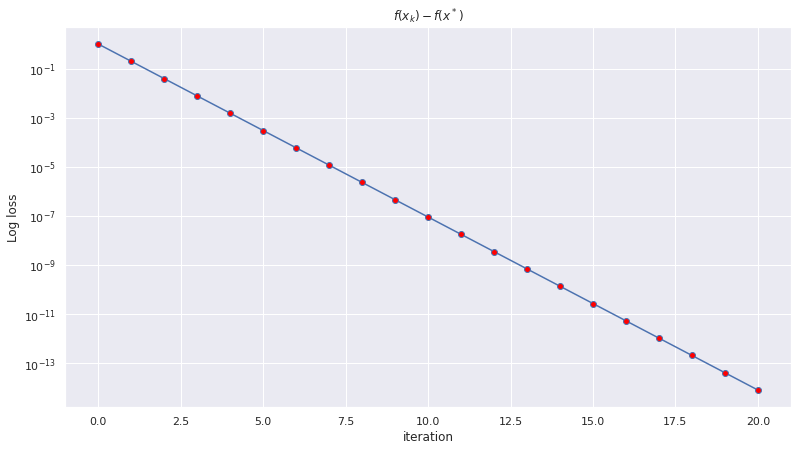

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
plt.semilogy(ydata, marker = 'o', markerfacecolor  = 'red')
plt.title(f'$f(x_k) - f(x^*)$')
plt.xlabel('iteration')
plt.ylabel('Log loss')
plt.show()

### Демонстрация локальной сходимости


In [ ]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "html5"
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
import numpy as np

x_min, x_max = -3, 3
y_min, y_max = 1, 3
N_iter = 4
x_0 = 0.9



fig, ax = plt.subplots()
xdata = np.linspace(x_min,x_max)
ydata = np.sqrt(1 + xdata**2)
plt.plot(xdata, ydata)
plt.title(r'Newton method convergence for  $y = \sqrt{1 + x^2}$')
plt.xlabel(f'$x$')
plt.ylabel(f'$f(x)$')
line, = ax.plot([], [], marker='o', linestyle='-', color='r', label='Newton', lw=2)
plt.legend()
# ax.grid()
xdata, ydata = [x_0], [np.sqrt(1 + x_0**2)]

def data_gen(t=0):
    cnt = 0
    x = x_0
    while cnt < N_iter:
        cnt += 1
        x = -x**3
        yield x


def init():
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    line.set_data(xdata, ydata)
    return line,

def run(data):
    # update the data
    x = data
    y = np.sqrt(1 + x**2)
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

animation = matplotlib.animation.FuncAnimation(fig, run, data_gen, blit=False, interval=1000,
                              repeat=True, init_func=init)

In [ ]:
animation

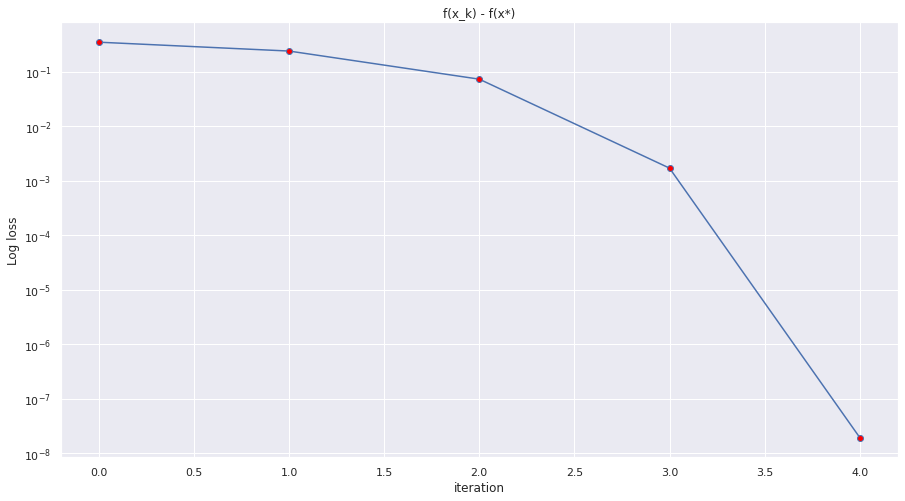

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.semilogy(ydata - np.ones(len(ydata)), marker = 'o', markerfacecolor  = 'red')
plt.title('f(x_k) - f(x*)')
plt.xlabel('iteration')
plt.ylabel('Log loss')
plt.show()

Теперь попробуйте начать с $x_0 = 1.05$

### Newton против GD

[Источник](https://github.com/amkatrutsa/optimization_course/tree/master/Spring2020)

In [ ]:
import numpy as np

USE_COLAB = True
if USE_COLAB:
    !pip install git+https://github.com/amkatrutsa/liboptpy --quiet
        
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

n = 1000
m = 200
x0 = np.zeros((n,))
A = np.random.rand(n, m) * 10

import cvxpy as cvx
x = cvx.Variable((n, 1))

obj = cvx.Minimize(cvx.sum(-cvx.log(1 - A.T * x)) - 
                   cvx.sum(cvx.log(1 - cvx.square(x))))
prob = cvx.Problem(obj)
prob.solve(verbose=True, max_iters=1000)
print("Optimal value =", prob.value)

                                     CVXPY                                     
                                     v1.2.2                                    
(CVXPY) Nov 24 08:47:36 AM: Your problem has 1000 variables, 0 constraints, and 0 parameters.
(CVXPY) Nov 24 08:47:36 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 24 08:47:36 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 24 08:47:36 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 24 08:47:36 AM: Compiling problem (target solver=ECOS).
(CVXPY) Nov 24 08:47:36 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

/usr/local/lib/python3.7/dist-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Nov 24 08:47:36 AM: Finished problem compilation (took 2.034e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Nov 24 08:47:36 AM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Nov 24 08:47:38 AM: Problem status: optimal
(CVXPY) Nov 24 08:47:38 AM: Optimal value: -1.369e+03
(CVXPY) Nov 24 08:47:38 AM: Compilation took 2.034e-01 seconds
(CVXPY) Nov 24 08:47:38 AM: Solver (including time spent in interface) took 1.856e+00 seconds
Optimal value = -1368.6511129348162


In [ ]:
f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), axis=1) + 2 * x / (1 - np.power(x, 2))
hess_f = lambda x: (A.dot(np.diagflat(1 / (1 - A.T.dot(x))**2))).dot(A.T) + np.diagflat(2 * (1 + x**2) / (1 - x**2)**2)

In [ ]:
def Newton(f, gradf, hessf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = gradf(x)
        hess = hessf(x)
        h = np.linalg.solve(hess, -gradient)
        alpha = line_search(x, h, **opt_arg)
        x = x + alpha * h
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res

In [ ]:
newton = methods.so.NewtonMethod(f, grad_f, hess_f, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
x_newton = newton.solve(x0, tol=1e-6, max_iter=50, disp=True)

gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho=0.9, beta=0.1, init_alpha=1.))
x_gd = gd.solve(x0, tol=1e-4, max_iter=50, disp=True)

Required tolerance achieved!
Convergence in 14 iterations
Function value = -1368.3078712542704
Norm of gradient = 7.267774697565139e-10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Required tolerance achieved!
Convergence in 35 iterations
Function value = -1368.307871253778
Norm of gradient = 6.903825336922402e-05


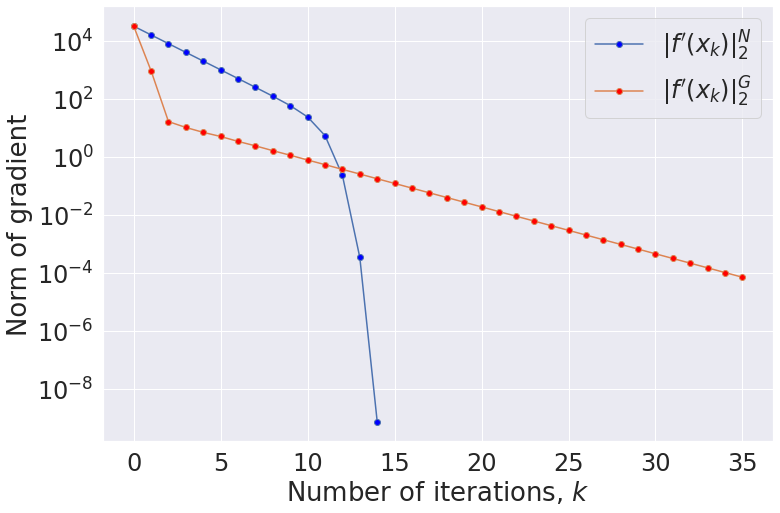

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

if not USE_COLAB:
    plt.rc("text", usetex=True)
    
plt.figure(figsize=(12, 8))
# Newton
plt.semilogy([np.linalg.norm(grad_f(x)) for x in newton.get_convergence()], marker = 'o', markerfacecolor  = 'blue', label="$\| f'(x_k) \|^{N}_2$")
# Gradient
plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], marker = 'o', markerfacecolor  = 'red', label="$\| f'(x_k) \|^{G}_2$")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Norm of gradient", fontsize=26)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend(loc="best", fontsize=24)
plt.show()

# Домашнее задание №4

$\boxed{\textbf{deadline}\text{: 17:59 (Московское время), 7 декабря}}$

##**Задание 1: Newton convergence issue**
Рассмотрите следующую функцию:

$$
f(x,y) = \dfrac{x^4}{4} - x^2 + 2x + (y-1)^2
$$

И точку старта $x_0 = (0,2)^\top$. Как ведет себя метод Ньютона, запущенный с этой точки? Чем это можно объяснить? 

Как ведет себя градиентный спуск с фикисрованным шагом $\alpha = 0.01$ и метод наискорейшего спуска в таких же условиях?

## **Задание 2: Quasi Comparison**
Реализуйте на языке python:
* метод Ньютона

для минимизации следующих функций:
* Квадратичная форма $f(x) = \dfrac{1}{2}x^\top A x + b^\top x, \quad x \in \mathbb{R}^n, A \in \mathbb{S}_+^{n \times n}$. Попробуйте n = 2, 50, 228
* Функция Розенброка $f(x, y) = (1-x)^2 + 100(y-x^2)^2 .\quad$

Сравните реализованный Вами метод И [метод](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html) `BFGS` из библиотеки `scipy`, а так же его модификацию [L-BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) в решении задачи минимизации описанных выше функций. Точку старта необходимо инициализировать одинаковую для всех методов в рамках одного запуска. Необходимо провести не менее 10 запусков для каждого метода на каждой функции до достижения того критерия остановки, который вы выберете (например, расстояние до точки оптимума - во всех задачах мы её знаем).

В качестве результата нужно заполнить следующие таблички, заполнив в них усредненное по числу запусков количество итераций, необходимых для сходимости и времени работы:

Критерий остановки `________`

Число запусков `_______`


| Квадратичная форма. n = 2 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |

| Квадратичная форма. n = 50 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |


| Квадратичная форма. n = 228 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |

| Функция Розенброка | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |